# DBSCAN


Comenzaremos cargando los mismos datasets sintéticos que cargamos en la clase de KMEANS


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from sklearn.datasets import make_blobs, make_moons

X1, y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=0)
X2, y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=0)
X3, y3 = make_moons(n_samples=1000, noise=.05, random_state=0)

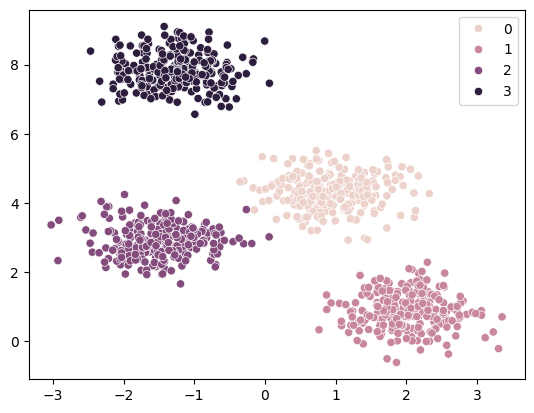

In [ ]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1)
plt.show()

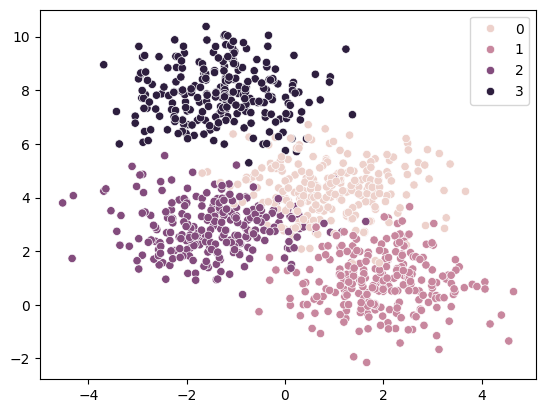

In [ ]:
sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2)
plt.show()

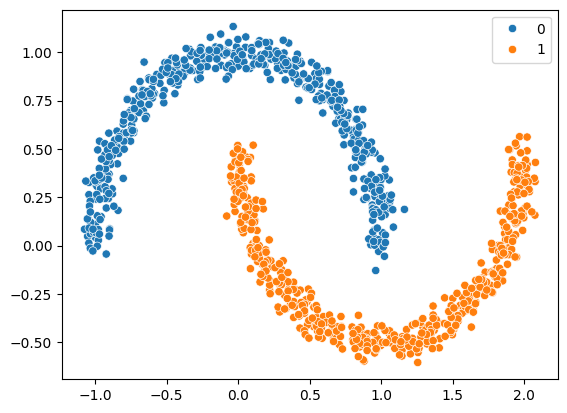

In [ ]:
sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3)
plt.show()

Ahora deben importar DBSCAN (de sklearn) y definir 3 modelos. Cada uno con su propio valor de eps y min_samples.

Para el modelo 1: epsilon de 0.3 y min_samples 10

Para el modelo 2: epsilon de 0.4 y min samples 9

Para el modelo 3: epsilon de 0.2 y min_samples 10

In [ ]:
from sklearn.cluster import DBSCAN

db_1 = DBSCAN(eps=0.9, min_samples=10)
db_2 = DBSCAN(eps=0.4, min_samples=5)
db_3 = DBSCAN(eps=0.1, min_samples=10)

Al igual que KMEANS, ahora debemos entrenar cada uno de los modelos

In [ ]:
db_1.fit(X1)
db_2.fit(X2)
db_3.fit(X3)

DBSCAN(eps=0.1, min_samples=10)

Podemos consultar las etiquetas asignadas luego de entrenar en la variable labels_. Notemos que cuando el label sea igual a '-1' quiere decir que esa instancia fue considerada ruido.

In [ ]:
labels_1 = db_1.labels_

In [ ]:
labels_1

array([0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 2, 1, 0,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 1, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 2, 1, 0, 2,

In [ ]:
labels_2 = db_2.labels_
labels_3 = db_3.labels_

print(f"Clusters en dataset 2: {np.unique(labels_2)}\nClusters en dataset 3: {np.unique(labels_3)}")

Clusters en dataset 2: [-1  0  1]
Clusters en dataset 3: [-1  0  1]


La siguiente función plotea los resultados de manera tal que colorea con distintos colores los distintos clusters, en gris los datos que se consideran Noise y ademas en tamaño mas grande las instancias que son CORES. No hace falta que cambien nada de esta función.

In [ ]:
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Armamos una mascara, con unos en los datos que son CORES.
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title(f"Número de clusters: {n_clusters_1}")
    plt.show()
    return

Ploteamos el resultado para el primer caso. Les parece adecuado el resultado? Pruebe que pasa si modifica los parámetros de epsilon y min_dist.

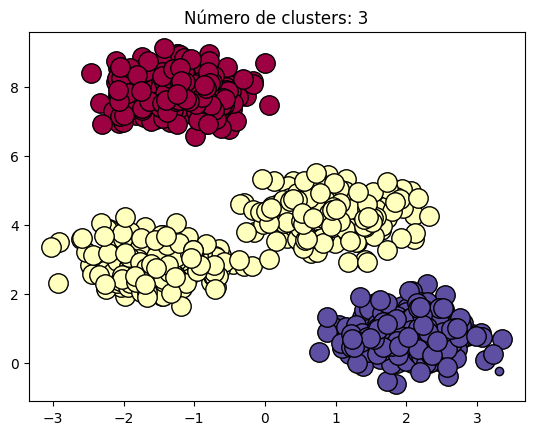

In [ ]:
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0) #Obtenemos el número de clusters descartando los -1 (noise)
plot_DBSCAN(X1,labels_1,db_1,n_clusters_1)

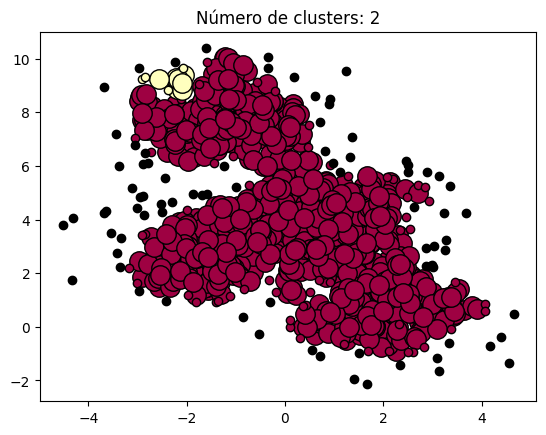

In [ ]:
#db_2 = DBSCAN(eps=0.4, min_samples=5)
n_clusters_2 = len(set(labels_2)) - (1 if -1 in labels_2 else 0)
plot_DBSCAN(X2,labels_2,db_2,n_clusters_2)

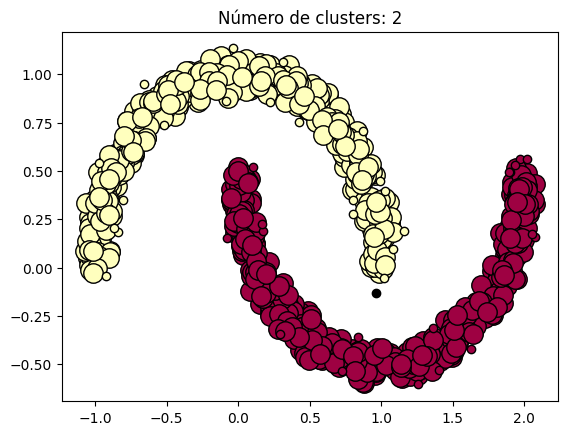

In [ ]:
n_clusters_3 = len(set(labels_3)) - (1 if -1 in labels_3 else 0)
plot_DBSCAN(X3,labels_3,db_3,n_clusters_3)

# Desafío

Al igual que con KMEANS, segmentar el siguiente dataset y comparar los resultados obtenidos con los de KMEANS

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mEzq69qMsTkPt-ciGAFYmhMF2jt2q0k5' -O users.csv

--2024-07-29 23:00:06--  https://docs.google.com/uc?export=download&id=1mEzq69qMsTkPt-ciGAFYmhMF2jt2q0k5
Resolving docs.google.com (docs.google.com)... 173.194.174.101, 173.194.174.138, 173.194.174.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.174.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1mEzq69qMsTkPt-ciGAFYmhMF2jt2q0k5&export=download [following]
--2024-07-29 23:00:06--  https://drive.usercontent.google.com/download?id=1mEzq69qMsTkPt-ciGAFYmhMF2jt2q0k5&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220188 (215K) [application/octet-stream]
Saving to: ‘users.csv’

users.csv           100%[===================>] 215.03K  --.-KB/s    in 

In [ ]:
import pandas as pd

df = pd.read_csv("/content/users.csv", sep='\t')
df = df[["ID", "Education", "Marital_Status", "Income", "Kidhome", "Teenhome",
              "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
              "MntSweetProducts", "NumWebPurchases"]]
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,8
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,1
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,8
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,2
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,46,27,5


In [ ]:
df.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoders = {}
categorical_columns = ["Education", "Marital_Status"]
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop("ID", axis=1))

In [ ]:
scaled_features

array([[-0.35052725,  0.25421812,  0.2340627 , ...,  2.45456767,
         1.48482696,  1.42855332],
       [-0.35052725,  0.25421812, -0.23455948, ..., -0.65103787,
        -0.63388018, -1.12588116],
       [-0.35052725,  1.18230273,  0.76947764, ...,  1.34020333,
        -0.14682107,  1.42855332],
       ...,
       [-0.35052725, -1.60195109,  0.18809052, ..., -0.10298983,
        -0.36599767, -0.76096195],
       [ 0.53924181,  1.18230273,  0.67538765, ...,  0.77388702,
         0.07235553,  0.6987149 ],
       [ 1.42901088, -0.67386649,  0.02470453, ..., -0.65103787,
        -0.63388018, -0.39604274]])

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=5)

In [ ]:
clusters = dbscan.fit(scaled_features)

In [ ]:
n_clusters = len(set(clusters.labels_)) - (1 if -1 in clusters.labels_ else 0)

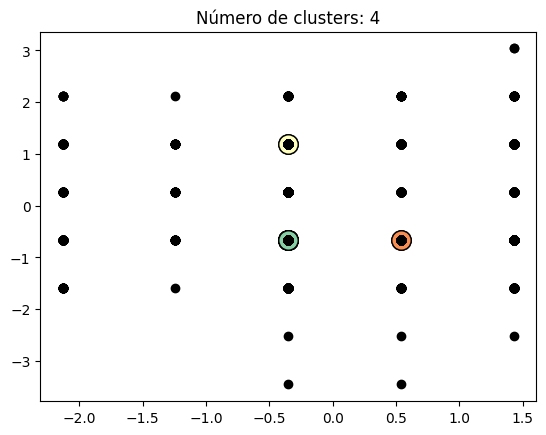

In [ ]:
plot_DBSCAN(scaled_features,clusters.labels_,clusters,n_clusters)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
clusters = dbscan.fit_predict(scaled_features)

In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
unique_clusters = set(clusters)
colors = [plt.cm.Spectral(each) for each in range(len(unique_clusters))]



<Figure size 1000x600 with 0 Axes>

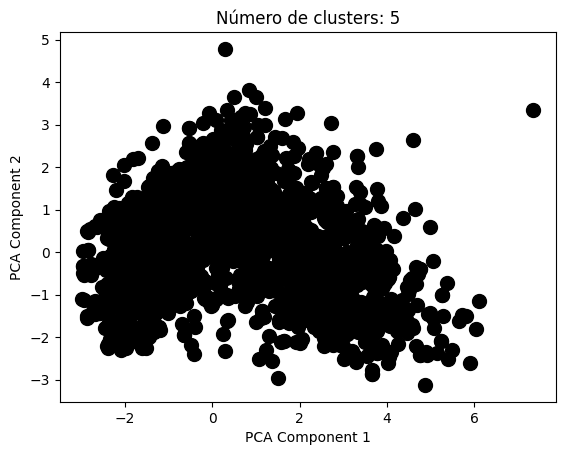

In [ ]:
for cluster, color in zip(unique_clusters, colors):
    if cluster == -1:

        color = [0, 0, 0, 1]
    cluster_mask = (clusters == cluster)
    xy = pca_components[cluster_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(color), markeredgecolor='k', markersize=10)

plt.title(f'Número de clusters: {len(unique_clusters)}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()